In [1]:
import xarray as xr

# Path to the NetCDF file
netcdf_file = r"C:\Users\Subhadeep Maishal\Music\2D_CASE\test_Ram_Setu.nc"

# Open the NetCDF file
try:
    ds = xr.open_dataset(netcdf_file)
    # Display the structure of the NetCDF file
    ds_info = ds
except Exception as e:
    ds_info = f"Error opening NetCDF file: {e}"

ds_info


C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<xarray.Dataset> Size: 16kB
Dimensions:    (depth: 1, time: 24, latitude: 6, longitude: 7)
Coordinates:
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 24B 8.5 8.75 9.0 9.25 9.5 9.75
  * longitude  (longitude) float32 28B 78.5 78.75 79.0 79.25 79.5 79.75 80.0
  * time       (time) datetime64[ns] 192B 2022-01-01 2022-02-01 ... 2023-12-01
Data variables:
    fe         (time, depth, latitude, longitude) float32 4kB ...
    no3        (time, depth, latitude, longitude) float32 4kB ...
    po4        (time, depth, latitude, longitude) float32 4kB ...
    si         (time, depth, latitude, longitude) float32 4kB ...
Attributes:
    Conventions:       CF-1.11
    title:             Monthly mean fields for product GLOBAL_ANALYSIS_FORECA...
    institution:       Mercator Ocean
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    source:            MERCATOR BIOMER4V2R1
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           servicedesk.cmems@mercator-ocean.eu
    references:        http://marine.copernicus.eu
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_ANALYSISFORECAST_BGC_001_028
    subset:datasetId:  cmems_mod_glo_bgc-nut_anfc_0.25deg_P1M-m_202311
    subset:date:       2024-10-01T07:25:55.162Z

Epoch 1/50


C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


1/1 [==============================] - 1s 833ms/step - loss: 0.4032 - val_loss: 1.9755
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3780 - val_loss: 1.9768
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 0.3776 - val_loss: 1.9780
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3773 - val_loss: 1.9791
Epoch 5/50
1/1 [==============================] - 0s 47ms/step - loss: 0.3770 - val_loss: 1.9802
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3767 - val_loss: 1.9814
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3764 - val_loss: 1.9826
Epoch 8/50
1/1 [==============================] - 0s 47ms/step - loss: 0.3762 - val_loss: 1.9838
Epoch 9/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3759 - val_loss: 1.9850
Epoch 10/50
1/1 [==============================] - 0s 31ms/step - loss: 0.3756 - val_loss: 1.9862
Epoch 11/50
1/1 [======================

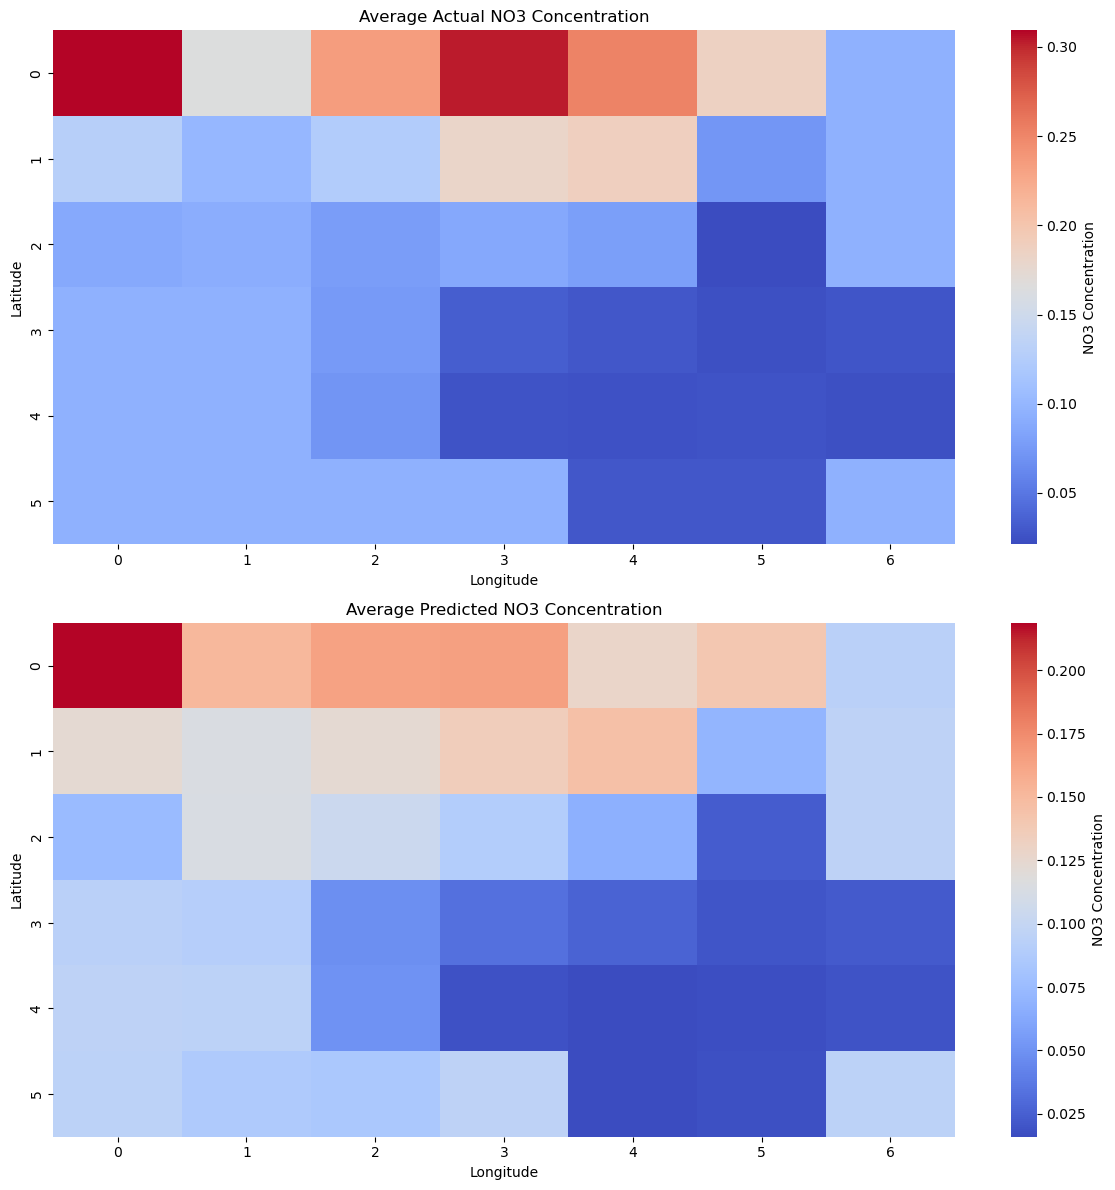

In [5]:
import xarray as xr
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
netcdf_file = r"C:\Users\Subhadeep Maishal\Music\2D_CASE\test_Ram_Setu.nc"
ds = xr.open_dataset(netcdf_file)

# Extract data variables
fe = ds['fe'].values  # (time, depth, lat, lon)
po4 = ds['po4'].values
si = ds['si'].values
no3 = ds['no3'].values

# Since depth is constant, we'll discard the depth dimension and focus on (time, lat, lon)
fe = fe[:, 0, :, :]
po4 = po4[:, 0, :, :]
si = si[:, 0, :, :]
no3 = no3[:, 0, :, :]

# Remove NaN values from the NO3 data for processing
no3 = np.nan_to_num(no3, nan=np.nanmean(no3))  # Replace NaN with the mean of the available values

# Stack the input variables along a new channel dimension (fe, po4, si)
inputs = np.stack([fe, po4, si], axis=-1)  # Shape: (time, lat, lon, channels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, no3, test_size=0.2, random_state=42)

# Normalize the data
scaler_X = StandardScaler()
X_train_reshaped = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_test_reshaped = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2] * X_test.shape[3])
X_train_scaled = scaler_X.fit_transform(X_train_reshaped).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test_reshaped).reshape(X_test.shape)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, y_train.shape[1] * y_train.shape[2])).reshape(y_train.shape)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, y_test.shape[1] * y_test.shape[2])).reshape(y_test.shape)

# Define the 2D CNN model with adjusted layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1] * y_train.shape[2])  # Output shape is flattened (lat * lon)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train_scaled.reshape(y_train_scaled.shape[0], -1), epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test_scaled.reshape(y_test_scaled.shape[0], -1))

# Make predictions
predictions = model.predict(X_test_scaled)
predicted_no3 = scaler_y.inverse_transform(predictions.reshape(-1, y_test.shape[1] * y_test.shape[2])).reshape(y_test.shape)

print("Test Loss:", test_loss)

# Compute average actual and predicted NO3 across time steps
average_actual = np.nanmean(y_test, axis=0)  # Average across time dimension
average_predicted = np.nanmean(predicted_no3, axis=0)  # Average across time dimension

# Visualization
def plot_average_no3(actual, predicted, ax):
    # Actual NO3 average
    sns.heatmap(actual, ax=ax[0], cmap="coolwarm", cbar_kws={'label': 'NO3 Concentration'}, annot=False)
    ax[0].set_title('Average Actual NO3 Concentration')
    ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')

    # Predicted NO3 average
    sns.heatmap(predicted, ax=ax[1], cmap="coolwarm", cbar_kws={'label': 'NO3 Concentration'}, annot=False)
    ax[1].set_title('Average Predicted NO3 Concentration')
    ax[1].set_xlabel('Longitude')
    ax[1].set_ylabel('Latitude')

# Plot all the graphs on a grid layout
fig, axs = plt.subplots(2, 1, figsize=(12, 12))  # Create a 2x1 grid

# Plot average actual and predicted NO3
plot_average_no3(average_actual, average_predicted, axs)

plt.tight_layout()
plt.show()


Epoch 1/50


C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


1/1 [==============================] - 1s 844ms/step - loss: 0.3978 - val_loss: 1.9765
Epoch 2/50
1/1 [==============================] - 0s 33ms/step - loss: 0.3777 - val_loss: 1.9786
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 0.3772 - val_loss: 1.9808
Epoch 4/50
1/1 [==============================] - 0s 34ms/step - loss: 0.3766 - val_loss: 1.9832
Epoch 5/50
1/1 [==============================] - 0s 33ms/step - loss: 0.3760 - val_loss: 1.9857
Epoch 6/50
1/1 [==============================] - 0s 42ms/step - loss: 0.3754 - val_loss: 1.9884
Epoch 7/50
1/1 [==============================] - 0s 35ms/step - loss: 0.3747 - val_loss: 1.9912
Epoch 8/50
1/1 [==============================] - 0s 33ms/step - loss: 0.3741 - val_loss: 1.9941
Epoch 9/50
1/1 [==============================] - 0s 33ms/step - loss: 0.3734 - val_loss: 1.9972
Epoch 10/50
1/1 [==============================] - 0s 32ms/step - loss: 0.3727 - val_loss: 2.0004
Epoch 11/50
1/1 [======================

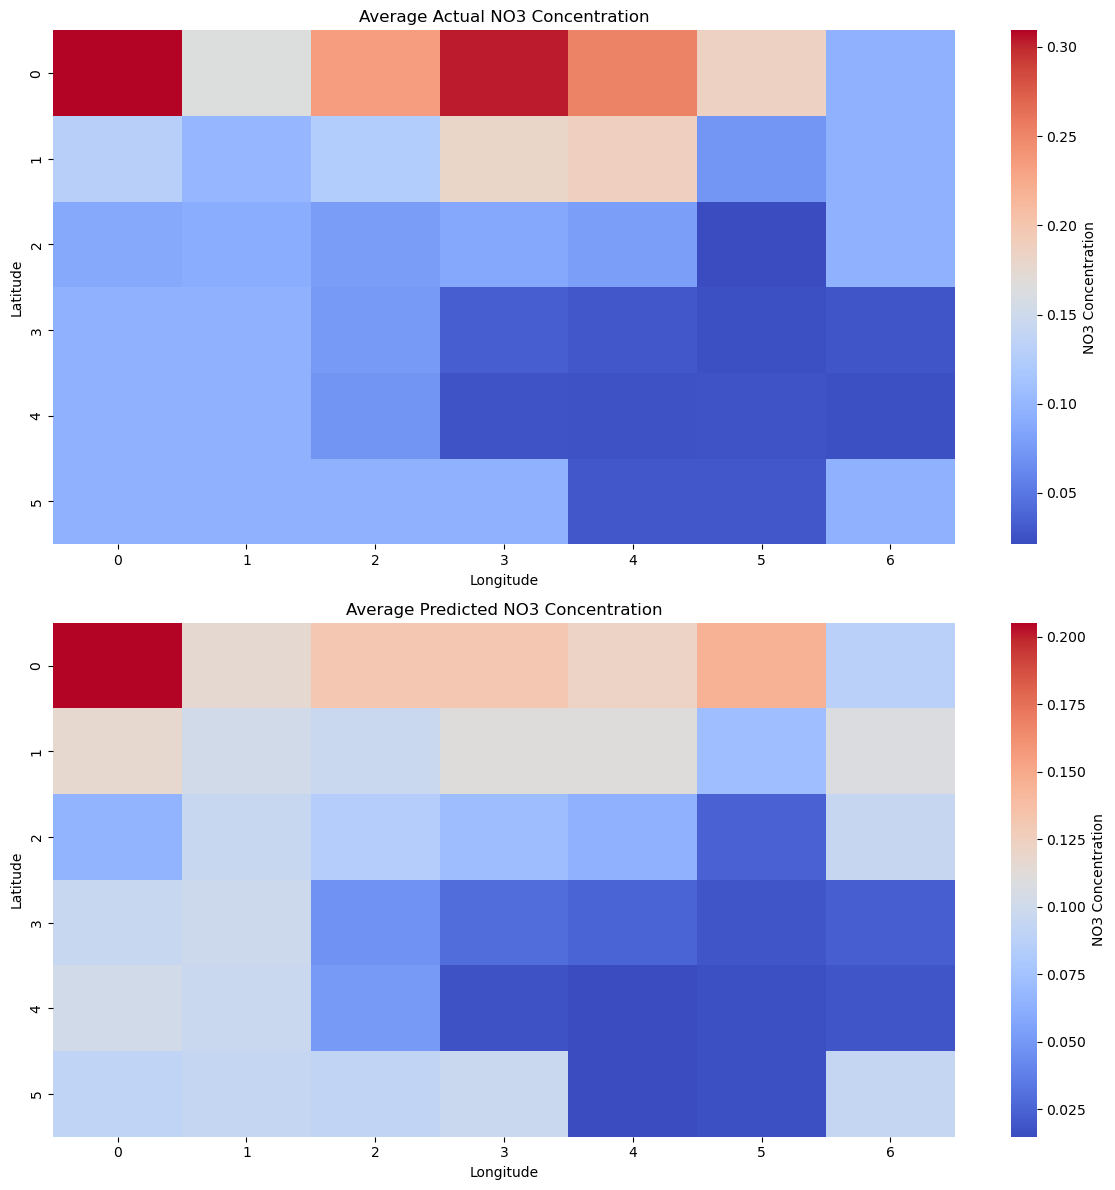

In [9]:
import xarray as xr
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
netcdf_file = r"C:\Users\Subhadeep Maishal\Music\2D_CASE\test_Ram_Setu.nc"
ds = xr.open_dataset(netcdf_file)

# Extract data variables
fe = ds['fe'].values  # (time, depth, lat, lon)
po4 = ds['po4'].values
si = ds['si'].values
no3 = ds['no3'].values

# Since depth is constant, we'll discard the depth dimension and focus on (time, lat, lon)
fe = fe[:, 0, :, :]
po4 = po4[:, 0, :, :]
si = si[:, 0, :, :]
no3 = no3[:, 0, :, :]

# Remove NaN values from the NO3 data for processing
no3 = np.nan_to_num(no3, nan=np.nanmean(no3))  # Replace NaN with the mean of the available values

# Stack the input variables along a new channel dimension (fe, po4, si)
inputs = np.stack([fe, po4, si], axis=-1)  # Shape: (time, lat, lon, channels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, no3, test_size=0.2, random_state=42)

# Normalize the data
scaler_X = StandardScaler()
X_train_reshaped = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_test_reshaped = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2] * X_test.shape[3])
X_train_scaled = scaler_X.fit_transform(X_train_reshaped).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test_reshaped).reshape(X_test.shape)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, y_train.shape[1] * y_train.shape[2])).reshape(y_train.shape)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, y_test.shape[1] * y_test.shape[2])).reshape(y_test.shape)

# Define the 2D CNN model with adjusted layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (2, 2), activation='linear'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1] * y_train.shape[2])  # Output shape is flattened (lat * lon)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train_scaled.reshape(y_train_scaled.shape[0], -1), epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test_scaled.reshape(y_test_scaled.shape[0], -1))

# Make predictions
predictions = model.predict(X_test_scaled)
predicted_no3 = scaler_y.inverse_transform(predictions.reshape(-1, y_test.shape[1] * y_test.shape[2])).reshape(y_test.shape)

print("Test Loss:", test_loss)

# Compute average actual and predicted NO3 across time steps
average_actual = np.nanmean(y_test, axis=0)  # Average across time dimension
average_predicted = np.nanmean(predicted_no3, axis=0)  # Average across time dimension

# Visualization
def plot_average_no3(actual, predicted, ax):
    # Actual NO3 average
    sns.heatmap(actual, ax=ax[0], cmap="coolwarm", cbar_kws={'label': 'NO3 Concentration'}, annot=False)
    ax[0].set_title('Average Actual NO3 Concentration')
    ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')

    # Predicted NO3 average
    sns.heatmap(predicted, ax=ax[1], cmap="coolwarm", cbar_kws={'label': 'NO3 Concentration'}, annot=False)
    ax[1].set_title('Average Predicted NO3 Concentration')
    ax[1].set_xlabel('Longitude')
    ax[1].set_ylabel('Latitude')

# Plot all the graphs on a grid layout
fig, axs = plt.subplots(2, 1, figsize=(12, 12))  # Create a 2x1 grid

# Plot average actual and predicted NO3
plot_average_no3(average_actual, average_predicted, axs)

plt.tight_layout()
plt.show()


In [ ]:
#                                ::  Explainable AI with Shapley ::

In [11]:
!pip install shap



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ------ --------------------------------- 71.7/456.1 kB 2.0 MB/s eta 0:00:01
   -------------- ------------------------- 163.8/456.1 kB 2.0 MB/s eta 0:00:01
   --------------------- ------------------ 245.8/456.1 kB 1.9 MB/s eta 0:00:01
   ---------------------------- ----------- 327.7/456.1 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.1 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.1 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.1 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.1 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
import xarray as xr
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import shap

# Load the dataset
netcdf_file = r"C:\Users\Subhadeep Maishal\Music\2D_CASE\test_Ram_Setu.nc"
ds = xr.open_dataset(netcdf_file)

# Extract data variables
fe = ds['fe'].values  # (time, depth, lat, lon)
po4 = ds['po4'].values
si = ds['si'].values
no3 = ds['no3'].values

# Since depth is constant, we'll discard the depth dimension and focus on (time, lat, lon)
fe = fe[:, 0, :, :]
po4 = po4[:, 0, :, :]
si = si[:, 0, :, :]
no3 = no3[:, 0, :, :]

# Remove NaN values from the NO3 data for processing
no3 = np.nan_to_num(no3, nan=np.nanmean(no3))  # Replace NaN with the mean of the available values

# Stack the input variables along a new channel dimension (fe, po4, si)
inputs = np.stack([fe, po4, si], axis=-1)  # Shape: (time, lat, lon, channels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, no3, test_size=0.2, random_state=42)

# Normalize the data
scaler_X = StandardScaler()
X_train_reshaped = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_test_reshaped = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2] * X_test.shape[3])
X_train_scaled = scaler_X.fit_transform(X_train_reshaped).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test_reshaped).reshape(X_test.shape)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, y_train.shape[1] * y_train.shape[2])).reshape(y_train.shape)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, y_test.shape[1] * y_test.shape[2])).reshape(y_test.shape)

# Define the 2D CNN model with adjusted layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1] * y_train.shape[2])  # Output shape is flattened (lat * lon)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train_scaled.reshape(y_train_scaled.shape[0], -1), epochs=50, batch_size=16, validation_split=0.2)

# Make predictions
predictions = model.predict(X_test_scaled)
predicted_no3 = scaler_y.inverse_transform(predictions.reshape(-1, y_test.shape[1] * y_test.shape[2])).reshape(y_test.shape)

# Compute Shapley values
explainer = shap.KernelExplainer(model.predict, X_train_scaled.reshape(-1, X_train.shape[1] * X_train.shape[2] * X_train.shape[3]))
shap_values = explainer.shap_values(X_test_scaled.reshape(-1, X_test.shape[1] * X_test.shape[2] * X_test.shape[3]))

# Visualize Shapley values for the first sample in the test set
shap.initjs()
shap.summary_plot(shap_values, feature_names=['Fe', 'PO4', 'Si'], max_display=10)


C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count





Epoch 1/50

1/1 [==============================] - 1s 987ms/step - loss: 0.3938 - val_loss: 1.9761
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 0.3778 - val_loss: 1.9775
Epoch 3/50
1/1 [==============================] - 0s 37ms/step - loss: 0.3774 - val_loss: 1.9790
Epoch 4/50
1/1 [==============================] - 0s 37ms/step - loss: 0.3771 - val_loss: 1.9804
Epoch 5/50
1/1 [==============================] - 0s 35ms/step - loss: 0.3767 - val_loss: 1.9820
Epoch 6/50
1/1 [==============================] - 0s 36ms/step - loss: 0.3763 - val_loss: 1.9835
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 0.3759 - val_loss: 1.9851
Epoch 8/50
1/1 [==============================] - 0s 35ms/step - loss: 0.3755 - val_loss: 1.9867
Epoch 9/50
1/1 [==============================] - 0s 34ms/step - loss: 0.3751 - val_loss: 1.9884
Epoch 10/50
1/1 [==============================] - 0s 34ms/step - loss: 0.3747 - val_loss: 1.9901
Epoch 11/50
1/1 [=======

In [ ]:
 #                   :: fix kernel 

Epoch 1/50


C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


1/1 [==============================] - 1s 819ms/step - loss: 0.3844 - val_loss: 1.9764
Epoch 2/50
1/1 [==============================] - 0s 37ms/step - loss: 0.3777 - val_loss: 1.9781
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 0.3773 - val_loss: 1.9799
Epoch 4/50
1/1 [==============================] - 0s 37ms/step - loss: 0.3768 - val_loss: 1.9817
Epoch 5/50
1/1 [==============================] - 0s 36ms/step - loss: 0.3764 - val_loss: 1.9835
Epoch 6/50
1/1 [==============================] - 0s 38ms/step - loss: 0.3759 - val_loss: 1.9854
Epoch 7/50
1/1 [==============================] - 0s 35ms/step - loss: 0.3755 - val_loss: 1.9873
Epoch 8/50
1/1 [==============================] - 0s 37ms/step - loss: 0.3750 - val_loss: 1.9892
Epoch 9/50
1/1 [==============================] - 0s 40ms/step - loss: 0.3745 - val_loss: 1.9913
Epoch 10/50
1/1 [==============================] - 0s 35ms/step - loss: 0.3741 - val_loss: 1.9933
Epoch 11/50
1/1 [======================

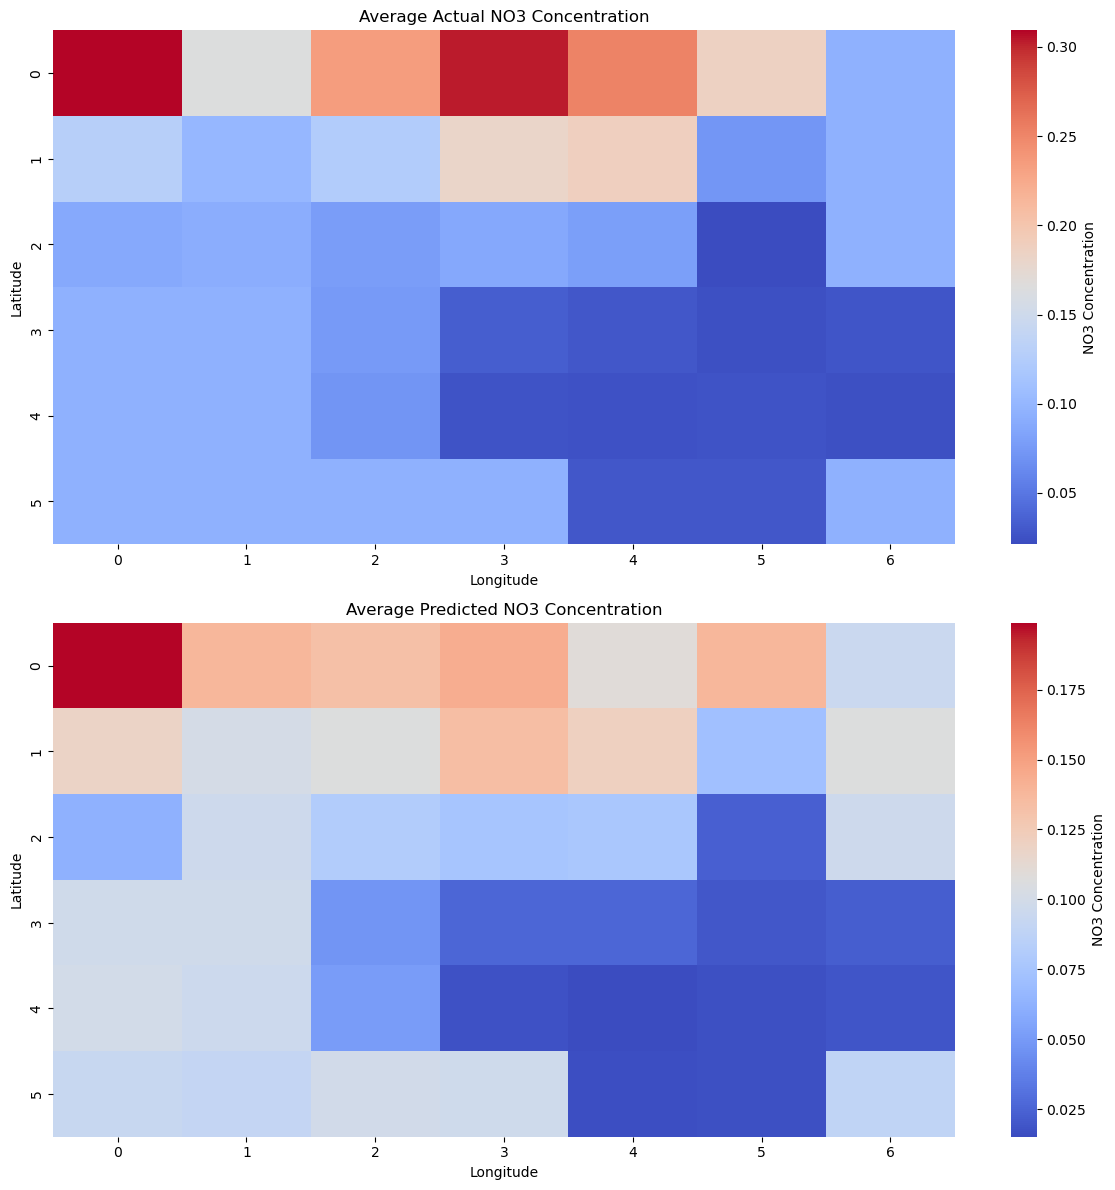

In [ ]:
import xarray as xr
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Load the dataset
netcdf_file = r"C:\Users\Subhadeep Maishal\Music\2D_CASE\test_Ram_Setu.nc"
ds = xr.open_dataset(netcdf_file)

# Extract data variables
fe = ds['fe'].values  # (time, depth, lat, lon)
po4 = ds['po4'].values
si = ds['si'].values
no3 = ds['no3'].values

# Since depth is constant, we'll discard the depth dimension and focus on (time, lat, lon)
fe = fe[:, 0, :, :]
po4 = po4[:, 0, :, :]
si = si[:, 0, :, :]
no3 = no3[:, 0, :, :]

# Remove NaN values from the NO3 data for processing
no3 = np.nan_to_num(no3, nan=np.nanmean(no3))  # Replace NaN with the mean of the available values

# Limit the dataset to a smaller subset for testing
subset_size = 100  # Number of time steps to use
fe = fe[:subset_size]
po4 = po4[:subset_size]
si = si[:subset_size]
no3 = no3[:subset_size]

# Stack the input variables along a new channel dimension (fe, po4, si)
inputs = np.stack([fe, po4, si], axis=-1)  # Shape: (time, lat, lon, channels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, no3, test_size=0.2, random_state=42)

# Normalize the data
scaler_X = StandardScaler()
X_train_reshaped = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_test_reshaped = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2] * X_test.shape[3])
X_train_scaled = scaler_X.fit_transform(X_train_reshaped).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test_reshaped).reshape(X_test.shape)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, y_train.shape[1] * y_train.shape[2])).reshape(y_train.shape)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, y_test.shape[1] * y_test.shape[2])).reshape(y_test.shape)

# Define the 2D CNN model with adjusted layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1] * y_train.shape[2])  # Output shape is flattened (lat * lon)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train_scaled.reshape(y_train_scaled.shape[0], -1), epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test_scaled.reshape(y_test_scaled.shape[0], -1))

# Make predictions
predictions = model.predict(X_test_scaled)
predicted_no3 = scaler_y.inverse_transform(predictions.reshape(-1, y_test.shape[1] * y_test.shape[2])).reshape(y_test.shape)

print("Test Loss:", test_loss)

# Compute average actual and predicted NO3 across time steps
average_actual = np.nanmean(y_test, axis=0)  # Average across time dimension
average_predicted = np.nanmean(predicted_no3, axis=0)  # Average across time dimension

# Extract latitude and longitude from the dataset
lat = ds['latitude'].values  # Adjusted for 'latitude'
lon = ds['longitude'].values  # Adjusted for 'longitude'

# Create visualization function without coastline
def plot_average_no3(ax, actual, predicted):
    # Actual NO3 average
    sns.heatmap(actual, ax=ax[0], cmap="coolwarm", cbar_kws={'label': 'NO3 Concentration'}, annot=False)
    ax[0].set_title('Average Actual NO3 Concentration')
    ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')

    # Predicted NO3 average
    sns.heatmap(predicted, ax=ax[1], cmap="coolwarm", cbar_kws={'label': 'NO3 Concentration'}, annot=False)
    ax[1].set_title('Average Predicted NO3 Concentration')
    ax[1].set_xlabel('Longitude')
    ax[1].set_ylabel('Latitude')

# Plot average actual and predicted NO3 without coastline
fig, axs = plt.subplots(2, 1, figsize=(12, 12))  # Create a 2x1 grid

plot_average_no3(axs, average_actual, average_predicted)

plt.tight_layout()
plt.show()

# Compute Shapley values
# Reshape X_test_scaled for SHAP to expect the right shape (samples, features)
X_test_flat = X_test_scaled.reshape(-1, X_test_scaled.shape[1] * X_test_scaled.shape[2] * X_test_scaled.shape[3])

# Create a SHAP explainer
explainer = shap.KernelExplainer(model.predict, X_train_scaled.reshape(-1, X_train_scaled.shape[1] * X_train_scaled.shape[2] * X_train_scaled.shape[3]))

# Calculate Shapley values for a subset of the test set (for computational efficiency)
shap_values = explainer.shap_values(X_test_flat[:10])  # Calculate for first 10 samples

# Visualize the Shapley values for the first test sample
shap.summary_plot(shap_values, X_test_flat[:10], feature_names=['Fe', 'Po4', 'Si'])
